#**Lab 6 Assignment: Producing Publication-Ready Figures**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

In [2]:
sns.set_style("white")
sns.set_context("paper")

In [58]:
gender_colors = {'man': 'blue', 'woman': 'tab:orange', 'boy': 'cornflowerblue', 'girl': 'sandybrown'}
bw_palette = ["white"]  # Adjusted to black and white for the boxplot

In [9]:
import numpy as np

<Axes: xlabel='class', ylabel='survived'>

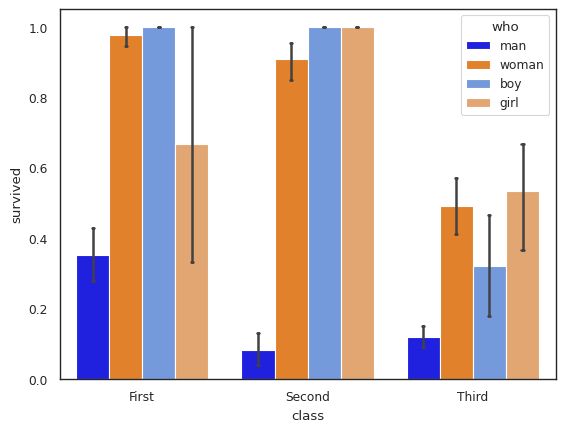

In [17]:
sns.barplot(data=lab3_data, x='class', y='survived', hue='who', palette=gender_colors, capsize=0.05, errorbar=('ci', 90))

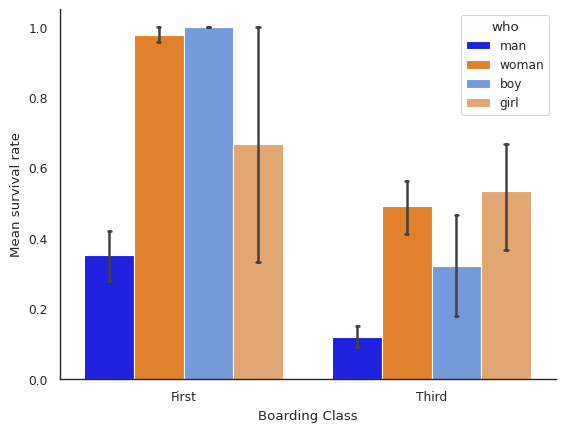

In [29]:
filtered_data = lab3_data[lab3_data['class'] != 'Second']
custom_order = ['First', 'Third']

ax = sns.barplot(data=filtered_data, x='class', y='survived', hue='who', palette=gender_colors,
                 order=custom_order, capsize=0.05, errorbar=('ci', 90))

ax.set_xlabel('Boarding Class')  # Set x-axis label
ax.set_ylabel('Mean survival rate')  # Set y-axis label

sns.despine()

Plot 2

<ipython-input-79-220577597344>:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  axes2 = sns.boxplot(data=lab3_data, x='survived', y='age', hue='who', palette=bw_palette, linewidth=1.5, zorder=5)


Text(0.5, 1.0, 'Boxplot')

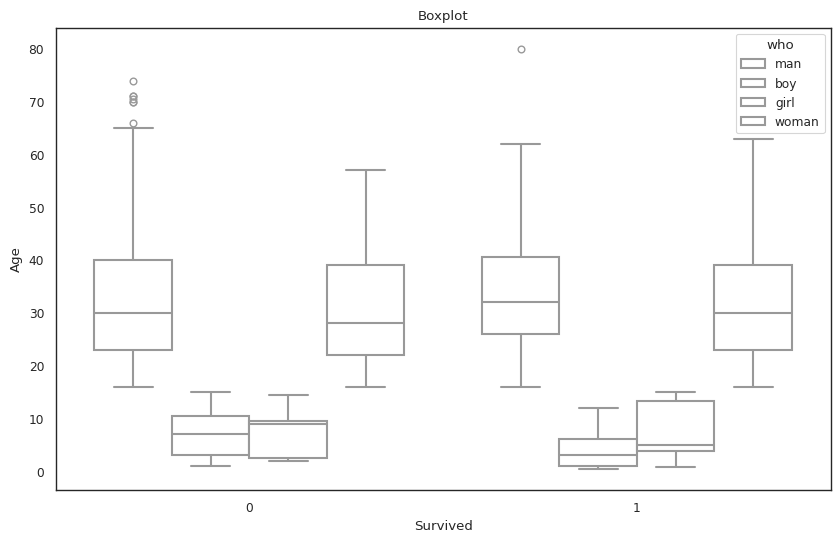

In [79]:
plt.figure(figsize=(10, 6))
axes2 = sns.boxplot(data=lab3_data, x='survived', y='age', hue='who', palette=bw_palette, linewidth=1.5, zorder=5)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Boxplot')

Text(0.5, 1.0, 'Stripplot')

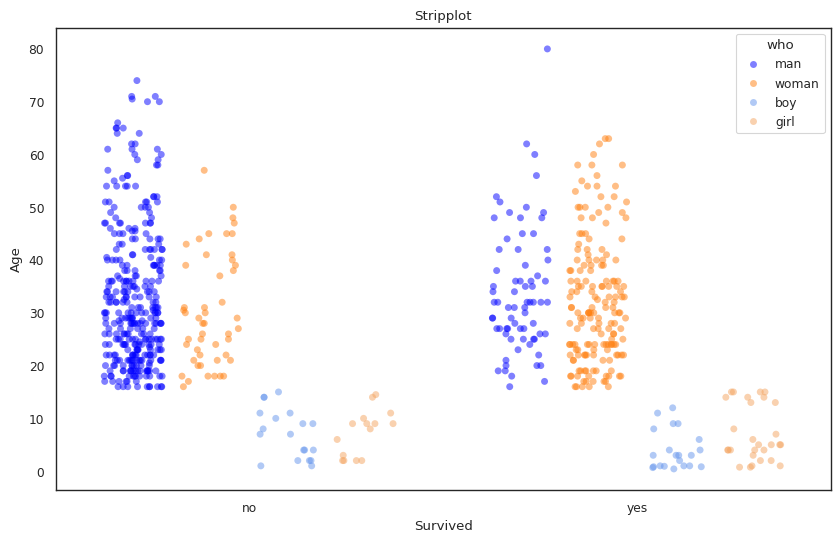

In [70]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge=True, palette=gender_colors)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Stripplot')

<ipython-input-76-b3367faae370>:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=bw_palette, linewidth=1.5)
<ipython-input-76-b3367faae370>:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, label in zip(legend.legendHandles, lab3_data['who'].unique()):


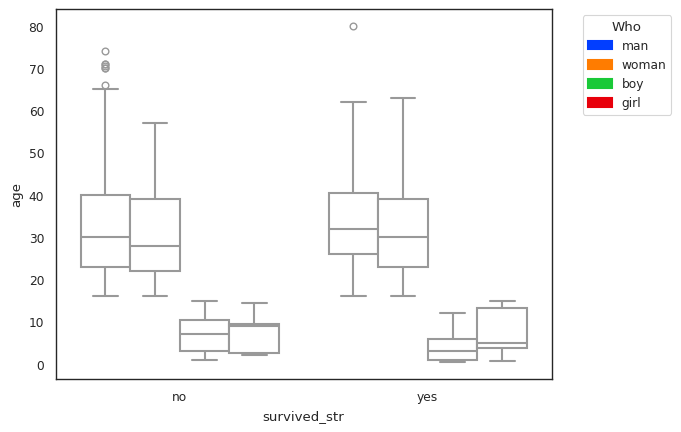

In [76]:
color_palette = sns.color_palette('bright', n_colors=len(lab3_data['who'].unique()))
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=bw_palette, linewidth=1.5)
legend = plt.legend(title='Who', bbox_to_anchor=(1.05, 1), loc='upper left')
for handle, label in zip(legend.legendHandles, lab3_data['who'].unique()):
    handle.set_color(color_palette[lab3_data['who'].unique().tolist().index(label)])

<Axes: xlabel='survived', ylabel='age'>

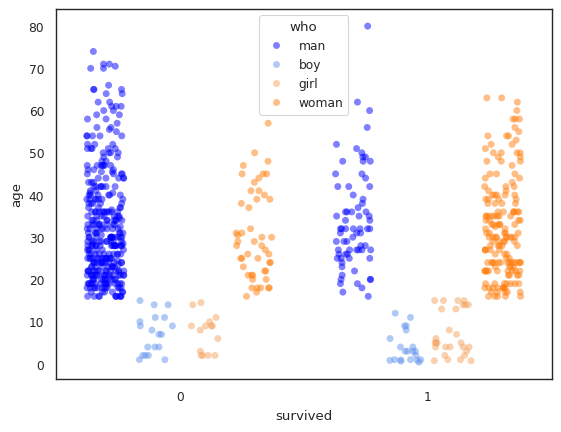

In [81]:
sns.stripplot(data=lab3_data, x='survived', y='age', hue='who', jitter=0.3, alpha=0.5, dodge=True, palette=gender_colors, zorder=0)

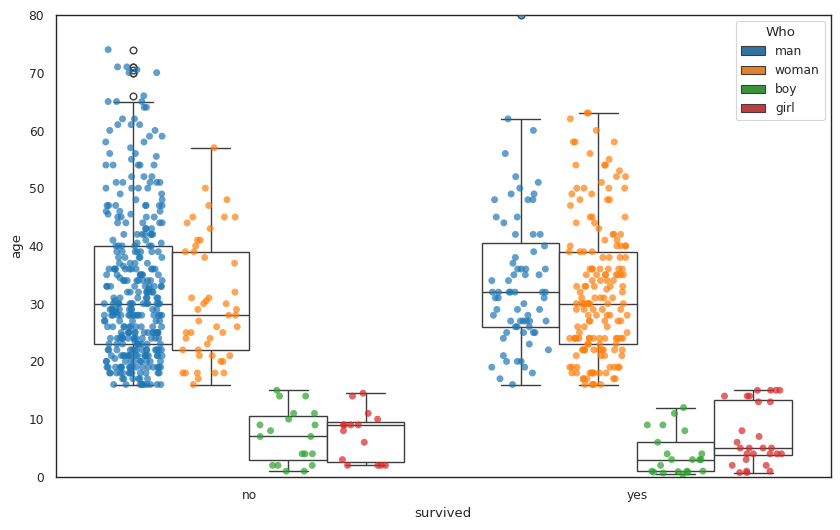

In [85]:
fig, axes2 = plt.subplots(figsize=(10, 6))
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.7, dodge=True, ax=axes2)
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', ax=axes2, dodge=True, boxprops=dict(facecolor='white', alpha=1.0))  # Set boxprops to make boxplot fully visible and white

plt.xlabel('survived')
handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='Who')

axes2.set_ylim(0, 80)  # Adjust y-axis limits for better visibility of data points
plt.show()

Plot 3

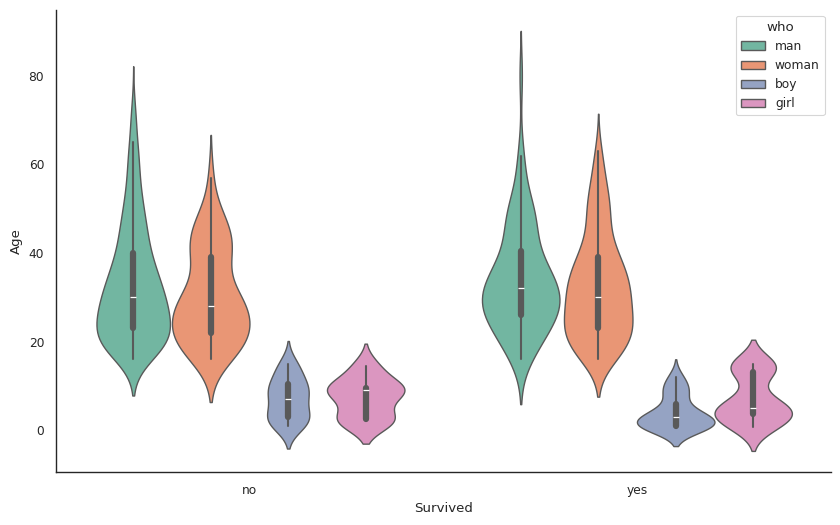

In [87]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=lab3_data, x='survived_str', y='age', hue='who', palette='Set2')

plt.xlabel('Survived')
plt.ylabel('Age')

sns.despine()
plt.show()

Plot 4

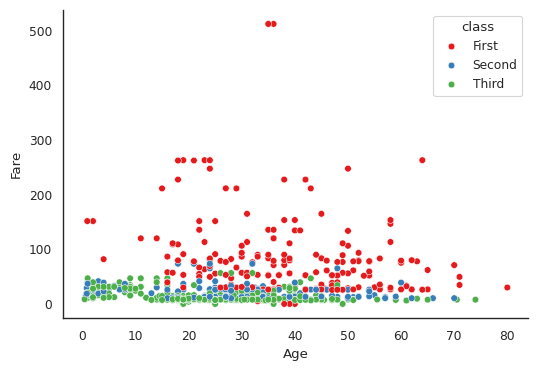

In [91]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=lab3_data, x='age', y='fare', hue='class', palette='Set1')

plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Fare')  # Set y-axis label
sns.despine()
plt.show()

Plot 5

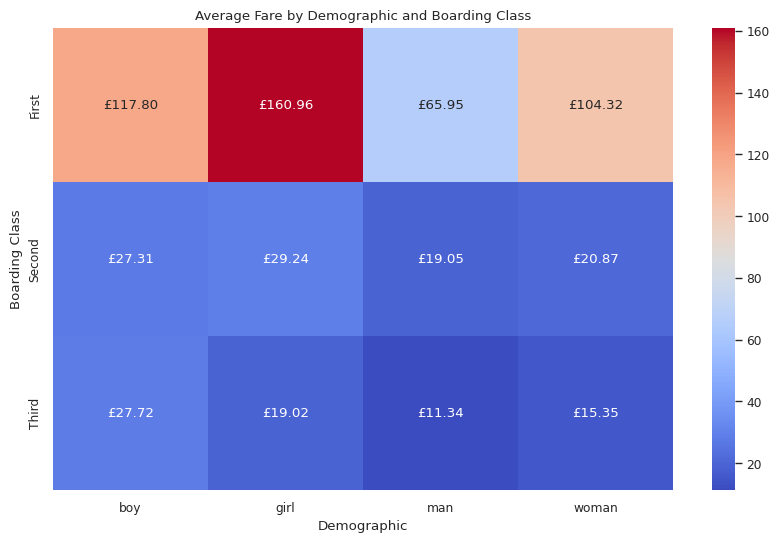

In [92]:
lab3_data_subset = lab3_data[['class', 'who', 'fare']].dropna(how='any')
lab3_data_subsetAverage = lab3_data_subset.groupby(['class', 'who']).mean().reset_index()

matrix_data = lab3_data_subsetAverage.pivot(index='class', columns='who', values='fare')

plt.figure(figsize=(10, 6))
axes5 = sns.heatmap(data=matrix_data, annot=True, fmt='.2f', cmap='coolwarm')

for text in axes5.texts:
    text.set_text('£' + text.get_text())

axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy', 'girl', 'man', 'woman'])

plt.title('Average Fare by Demographic and Boarding Class')
plt.show()